In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from lib import jsoncorpus, datastuff, analysis
import gensim
import traceback
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.ensemble
import sklearn.svm
import sklearn.decomposition
import sklearn.neighbors
from lib.scikitComponents import *
import itertools
import collections
from lib.scikitComponents import pipelines
import scipy.stats

## Data preprocessing

In [157]:
# Load in the previously created corpus and dictionary of scraped sites
Datas = collections.namedtuple('Datas', ['dictionary', 'corpus', 'meta_corpus', 'dmoz_data'])
unstemmed = Datas(*jsoncorpus.load_or_create('docs/sites.jl'))
stemmed = Datas(*jsoncorpus.load_or_create('docs/sites.jl', stemmed=True, prefix="stemmed_"))

Done.
Done.


In [158]:
def preprocess(data):
    # Set up array of input data
    X = zip(list(data.corpus), list(data.meta_corpus), data.dmoz_data['meta'])
    # Link topics to URLs
    meta = list(zip(data.dmoz_data['urls'], data.dmoz_data['dmoz_categories']))
    # Encode class labels
    classes, top_categories, dmoz_encoder = datastuff.encode_dmoz_categories(data.dmoz_data['dmoz_categories'])
    return (X, meta, classes, top_categories, dmoz_encoder)
X, meta, classes, top_categories, dmoz_encoder = preprocess(stemmed)

In [106]:
verbosity = 3

In [202]:
def newline_name(name):
    return "\n".join(reversed(name.split()))

def makeboxplot(scores, clfs, ylabel, figsize=None):
    inds = np.argsort(np.mean(np.array(scores).T, axis=0))
    scores_sorted = np.array(scores)[inds, :].T
    labels_sorted = np.array([newline_name(clf.name) for clf in clfs])[inds]
    if figsize:
        plt.figure(figsize=figsize)
                              
    box_params = dict(showmeans=True,widths=0.8, flierprops=dict(marker='o'), patch_artist=True)
    box = plt.boxplot(scores_sorted, labels = labels_sorted, **box_params)
    colors = ['b','g','pink','c','y','k']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.ylabel(ylabel)


## Boxplots for different representation combinations

In [114]:
clfs = np.array([
    pipelines.make_classifier(dictionary, body_kind=None, meta_kind='tfidf', classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind=None, meta_kind='count', classifier='svc'),
    pipelines.make_classifier(dictionary, body_kind='lda', meta_kind='count', classifier='svc'),
    pipelines.make_classifier(dictionary, body_kind='tfidf', meta_kind=None, classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind='lda', meta_kind=None, classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind='tfidf', meta_kind='tfidf', classifier = 'svc')
])

In [112]:
scores = [
    sklearn.cross_validation.cross_val_score(clf, X, classes, cv=5, verbose=verbosity, scoring='f1_weighted')
    for clf in clfs]

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.464761 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.449172 -   0.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495326 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.487274 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.373428 -   0.5s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.391314 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.373059 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.367752 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.416144 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.338891 -   0.5s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.430395 -  11.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.434068 -  11.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.437999 -  12.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.478224 -  13.2s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.388628 -  13.2s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   11.8s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.541130 -   1.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.542484 -   1.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.552980 -   1.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.506690 -   1.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.481371 -   1.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.249325 -  11.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.299517 -  11.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.286449 -  13.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.360573 -  12.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.299237 -  13.5s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.551907 -   3.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.554505 -   3.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.603026 -   2.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.563891 -   2.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495385 -   2.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.9s finished


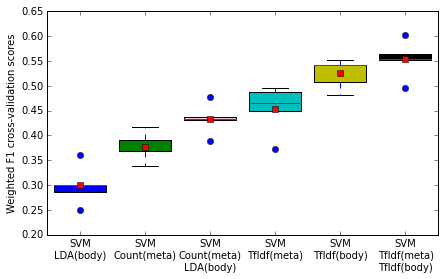

In [203]:
inds = np.argsort(np.mean(np.array(scores).T, axis=0))
scores_sorted = np.array(scores)[inds, :].T
labels_sorted = np.array([newline_name(clf.name) for clf in clfs])[inds]
                              
makeboxplot(scores, clfs, 'Weighted F1 cross-validation scores', (7, 4))


## Stemming comparison

In [159]:
X_s, meta_s, classes_s, top_categories_s, dmoz_encoder_s = preprocess(stemmed)
X_u, meta_u, classes_u, top_categories_u, dmoz_encoder_u = preprocess(unstemmed)

In [184]:
clf_s = pipelines.make_classifier(stemmed.dictionary, body_kind='tfidf', meta_kind='tfidf', classifier = 'svc')
clf_u = pipelines.make_classifier(unstemmed.dictionary, body_kind='tfidf', meta_kind='tfidf', classifier = 'svc')
clf_s.name = "stemmed " + clf_s.name
score_s = sklearn.cross_validation.cross_val_score(clf_s, X_s, classes_s, cv=5, verbose=verbosity, scoring='f1_weighted')
score_u = sklearn.cross_validation.cross_val_score(clf_u, X_u, classes_u, cv=5, verbose=verbosity, scoring='f1_weighted')

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.551907 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.554505 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.603026 -   2.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.563891 -   2.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495385 -   2.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.1s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495742 -   3.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.526985 -   3.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.558660 -   4.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.528004 -   2.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.465684 -   2.7s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.8s finished


Signifiance p-value = 13%


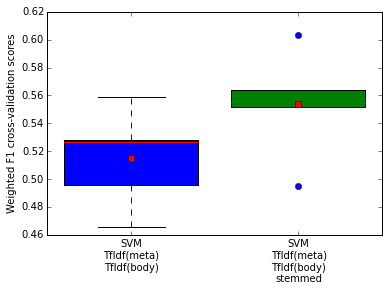

In [218]:
makeboxplot([score_s, score_u], [clf_s, clf_u], 'Weighted F1 cross-validation scores')
print "Signifiance p-value = {}%".format(int(scipy.stats.ttest_ind(score_s, score_u, equal_var=False)[1]*100))